<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/EDA_%26_Price_Prediction_of_Laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('/content/laptop_data.csv')

In [118]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [119]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [121]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [122]:
df.duplicated().sum()

0

In [123]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

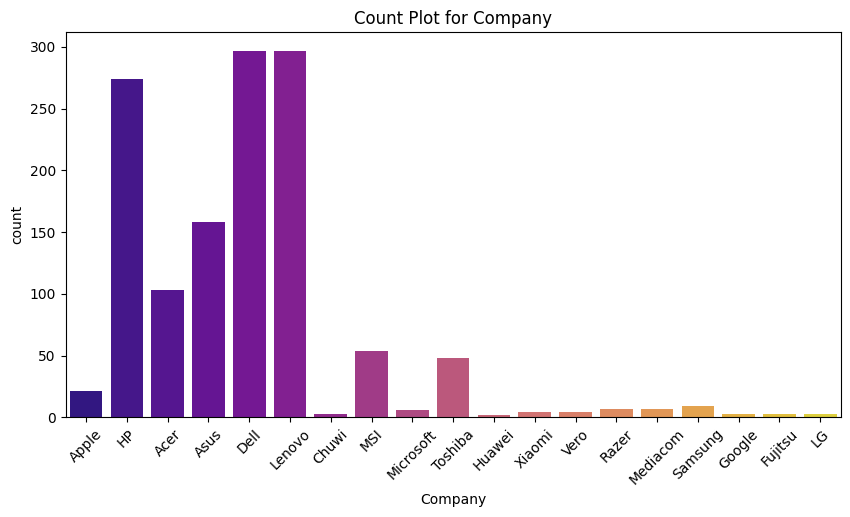

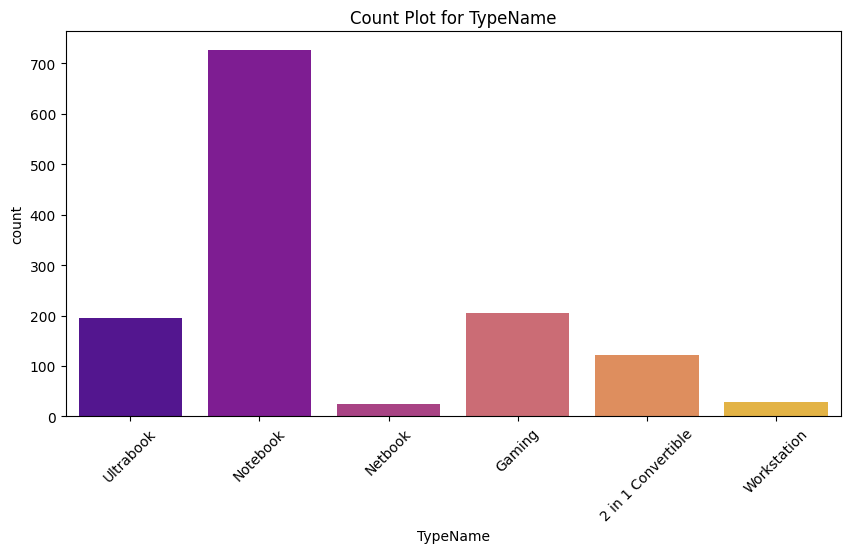

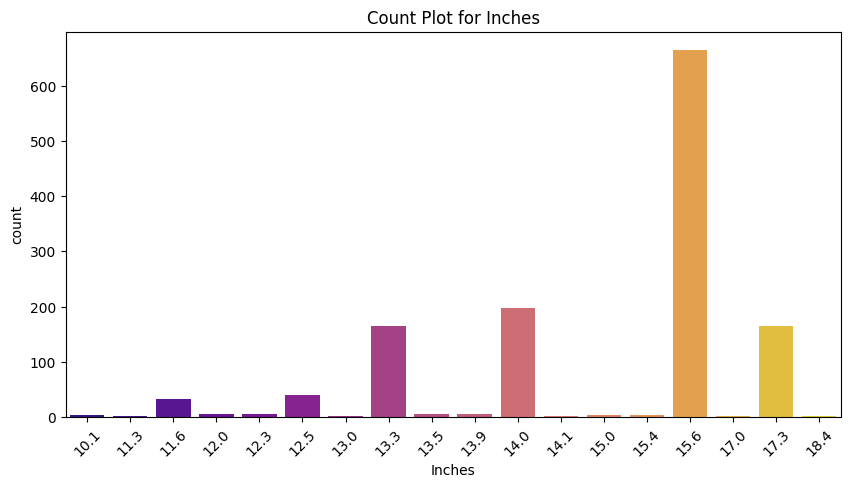

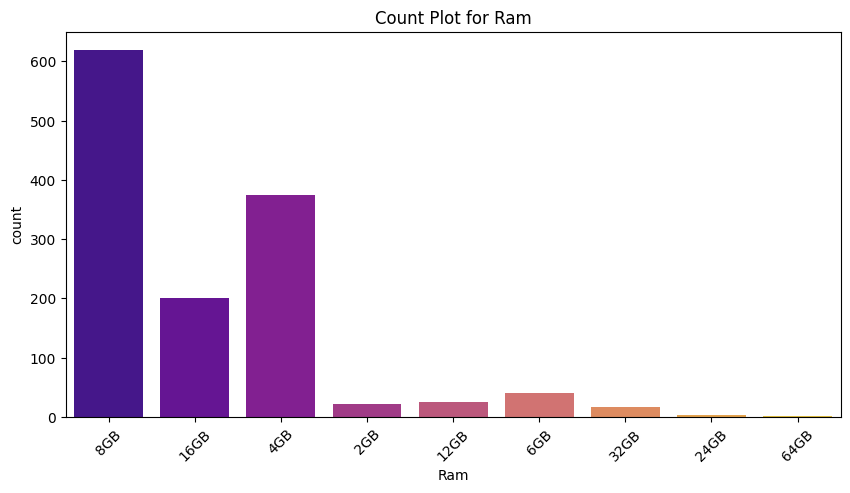

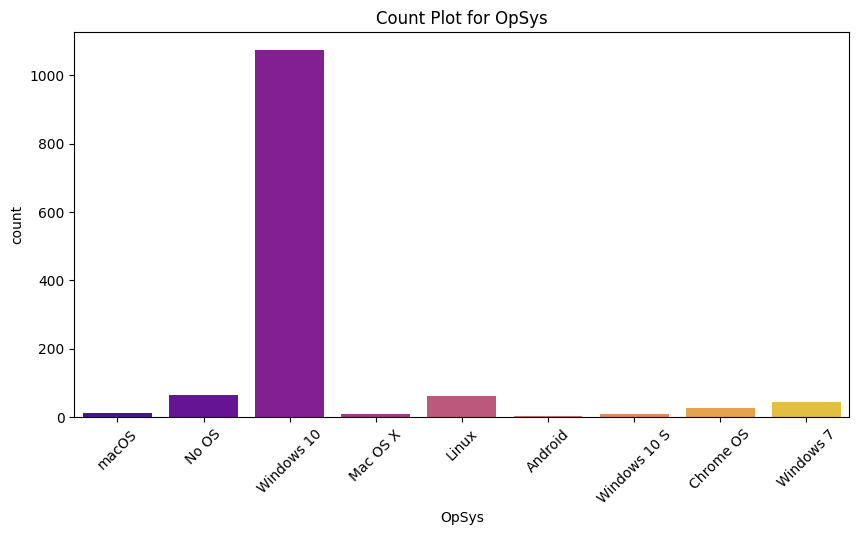

In [124]:
def plot_countplot(data, column):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data, palette='plasma')
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation = 45)
    plt.show()

columns = ['Company', 'TypeName', 'Inches', 'Ram', 'OpSys']

for col in columns:
    plot_countplot(df, col)


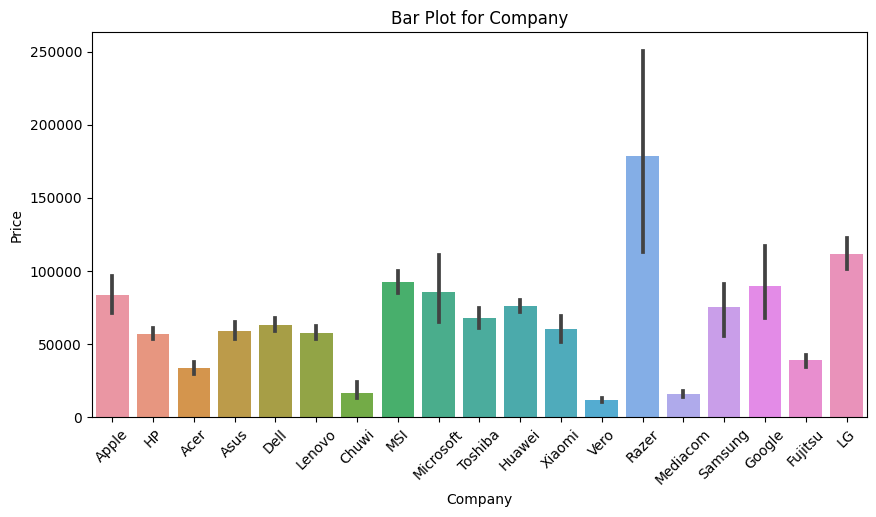

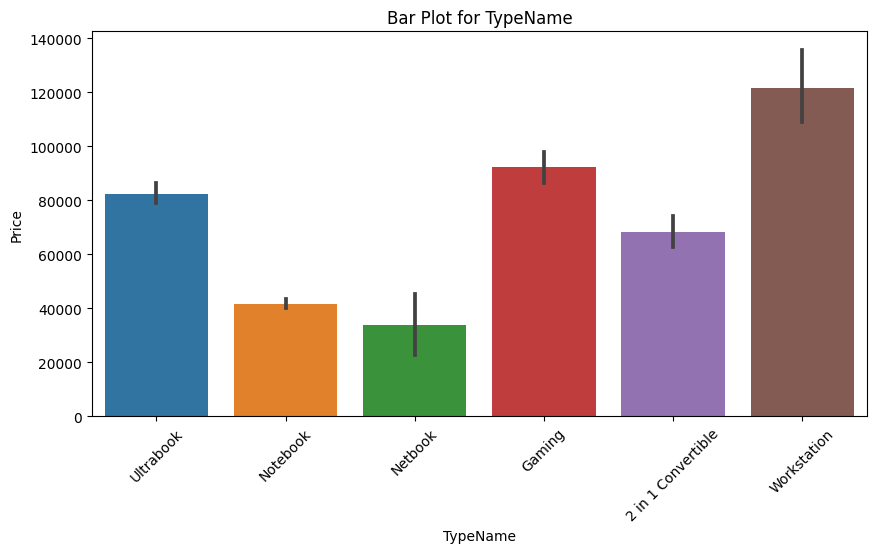

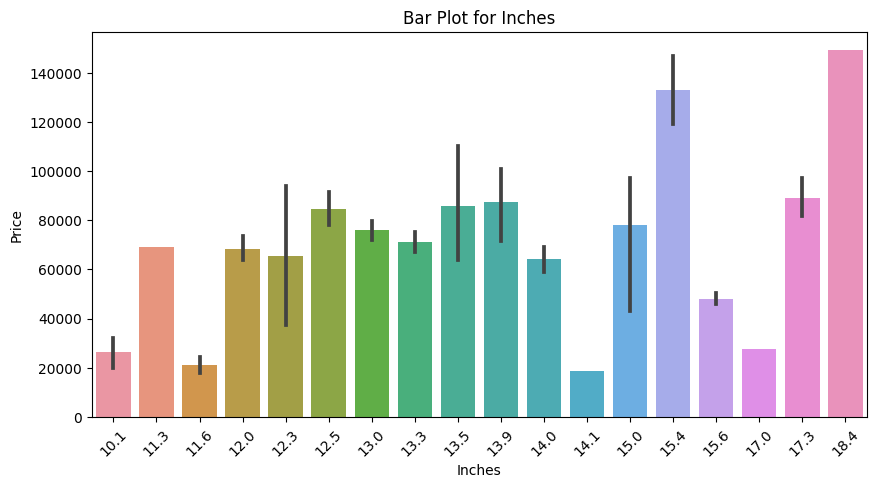

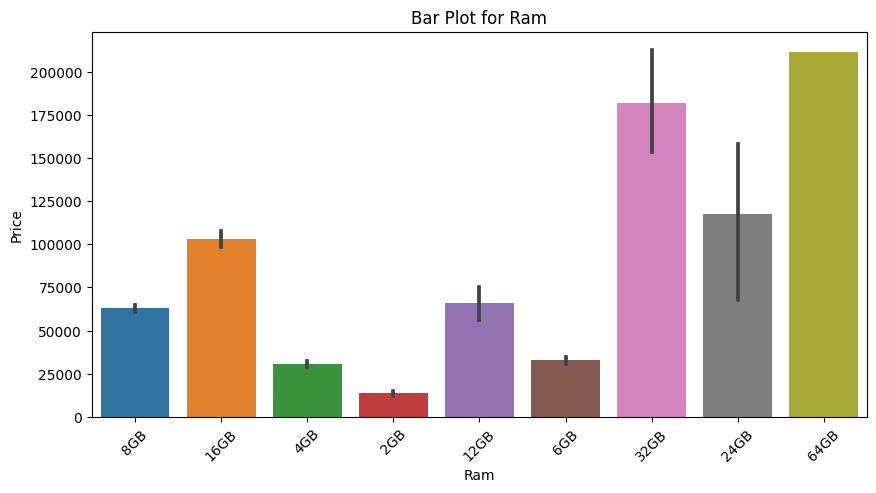

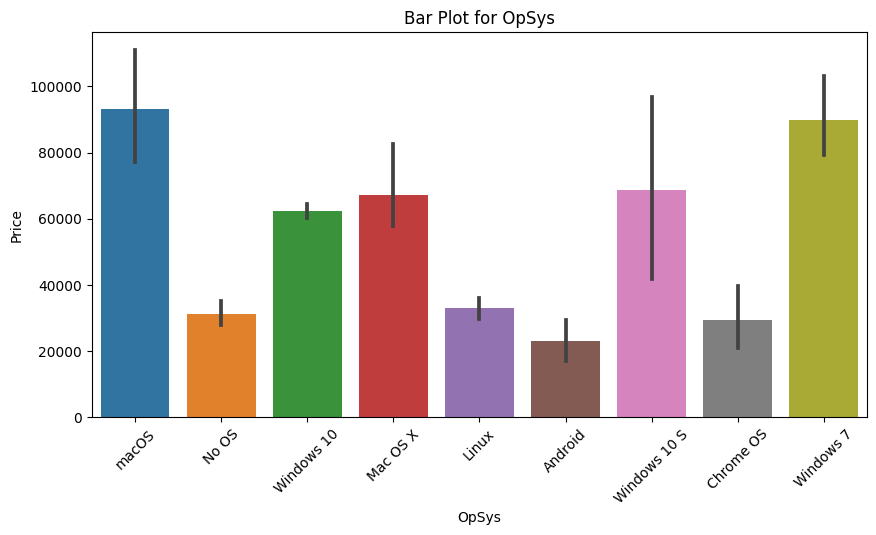

In [125]:
def plot_barplot(df, col):
  plt.figure(figsize = (10,5))
  sns.barplot(x = df[col], y = df['Price'])
  plt.xticks(rotation = 45)
  plt.title(f'Bar Plot for {col}')
  plt.show()

columns = ['Company', 'TypeName', 'Inches', 'Ram', 'OpSys']

for col in columns:
  plot_barplot(df, col)


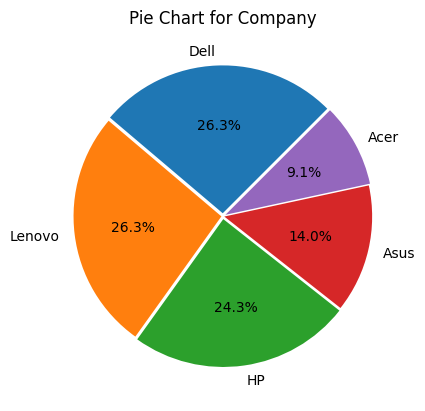

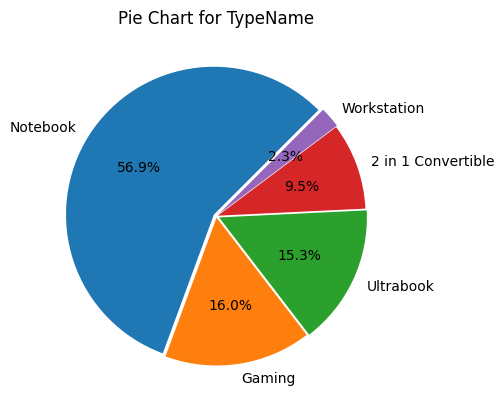

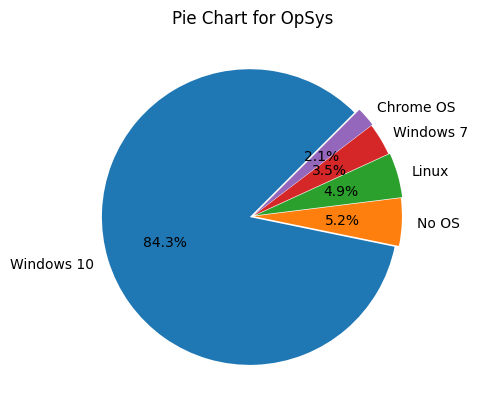

In [126]:
def plot_pieplot(data, column):
    counts = data[column].value_counts().head(5)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', explode = [0.02,0.01,0.02,0.01,0.02], startangle = 45)
    plt.title(f'Pie Chart for {column}')
    plt.show()

columns = ['Company', 'TypeName', 'OpSys']

for col in columns:
    plot_pieplot(df, col)


In [127]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

<ipython-input-128-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

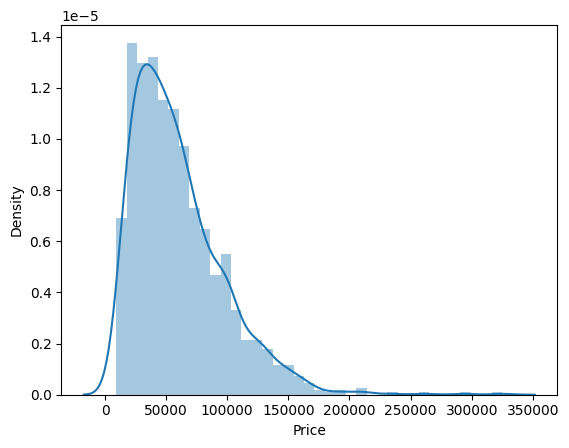

In [128]:
sns.distplot(df['Price'])

<ipython-input-129-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

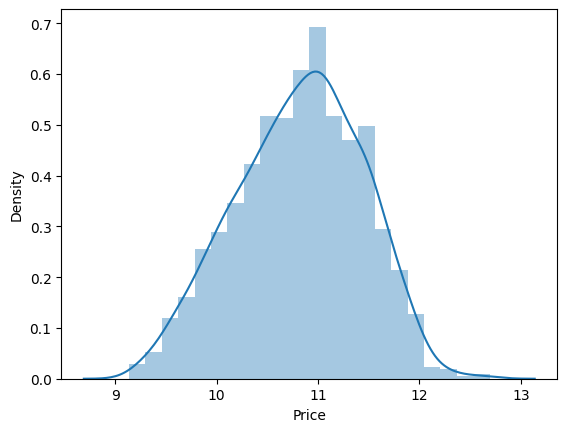

In [129]:
sns.distplot(np.log(df['Price']))

Now its uniformally distributed

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Company'] = le.fit_transform(df['Company'])
df['TypeName'] = le.fit_transform(df['TypeName'])

In [131]:
df['Company'].value_counts()

4     297
10    297
7     274
2     158
0     103
11     54
16     48
1      21
15      9
14      7
12      7
13      6
18      4
17      4
3       3
6       3
5       3
9       3
8       2
Name: Company, dtype: int64

In [132]:
# Extract integer values from the 'Ram' column
df['Ram'] = df['Ram'].str.extract(r'(\d+)').astype(int)

In [133]:
df['Weight'] = df['Weight'].str.extract(r'(\d+\.\d+)').astype(float)

In [134]:
df['Price'] = np.log(df['Price'])

In [135]:
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [136]:
res = df['ScreenResolution'].str.split('x').tolist()

In [137]:
width = [int(i[0]) for i in res]
length = [int(i[1]) for i in res]

In [138]:
# Create a DataFrame from the extracted data
df1 = pd.DataFrame({'Width': width, 'Length': length})

In [139]:
df = pd.concat([df, df1], axis = 1)

In [140]:
df.drop('ScreenResolution', axis = 1, inplace = True)

In [141]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [142]:
for idx, val in enumerate(df['OpSys']):
    if val == 'Windows 10' or val == 'Windows 10 S' or val == 'Windows 7':
        df.loc[idx, 'OpSys'] = 'Windows'
    elif val == 'macOS' or val == 'Mac OS X':
        df.loc[idx, 'OpSys'] = 'Mac'
    else:
        df.loc[idx, 'OpSys'] = 'Other'

In [143]:
df['OpSys'].value_counts()

Windows    1125
Other       157
Mac          21
Name: OpSys, dtype: int64

In [144]:
df['OpSys'] = le.fit_transform(df['OpSys'])

In [145]:
df['Cpu'] = [' '.join(cpu.split()[:3]) for cpu in df['Cpu'].tolist()]

In [146]:
df['Cpu'] = le.fit_transform(df['Cpu'])

In [147]:
df['Gpu'] = [' '.join(gpu.split()[:1]) for gpu in df['Gpu'].tolist()]

In [148]:
df['Gpu'] = le.fit_transform(df['Gpu'])

In [149]:
# This expression will replace 1.0GB to 1GB
df['Memory'] = df['Memory'].str.replace('\.0','',regex = True)

In [150]:
df['Memory'] = df['Memory'].str.replace('GB', '')

In [151]:
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [152]:
df1 = df['Memory'].str.split("+", n=1, expand =True)

In [153]:
df1.head(2)

,0,1
0,128 SSD,None
1,128 Flash Storage,None


In [154]:
df1[1].unique()

array([None, '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1000 Hybrid'], dtype=object)

In [155]:
def disk(val):
  df['Dick'+val] = df1[0].apply(lambda x:1 if val in x else 0)

value = ['SSD', 'HDD', 'Flash Storage', 'Hybrid']
for val in value:
  disk(val)

In [156]:
df['Memory'] = df['Memory'].str.replace('SSD', '')
df['Memory'] = df['Memory'].str.replace('HDD', '')
df['Memory'] = df['Memory'].str.replace('Flash Storage', '')
df['Memory'] = df['Memory'].str.replace('Hybrid', '')

In [157]:
df['PPI'] =( np.sqrt((df['Width'])**2 + (df['Length'])**2))/df['Inches']

In [158]:
df.drop('TypeName', axis = 1, inplace = True)

In [159]:
df['memory'] = df1[0].str.replace(r'\D+', '').astype(float)

<ipython-input-159-0c4ce031a443>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['memory'] = df1[0].str.replace(r'\D+', '').astype(float)


In [160]:
df['memory1'] = df1[1].str.replace(r'\D+', '').astype(float)

<ipython-input-160-fa0053967ed4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['memory1'] = df1[1].str.replace(r'\D+', '').astype(float)


In [161]:
df['memory1'] = df['memory1'].replace(np.nan, 0)

In [162]:
df['SSD'] = df['memory']*df['DickSSD'] + df['memory1']*df['DickSSD']
df['HDD'] = df['memory']*df['DickHDD'] + df['memory1']*df['DickHDD']
df['Flash'] = df['memory']*df['DickFlash Storage'] + df['memory1']*df['DickFlash Storage']
df['Hybrid'] = df['memory']*df['DickHybrid'] + df['memory1']*df['DickHybrid']

In [163]:
df.drop(['Memory','memory', 'memory1'], axis = 1, inplace = True)

In [164]:
df.drop(['DickSSD','DickHDD', 'DickFlash Storage', 'DickHybrid'], axis = 1, inplace = True)

In [165]:
df.head()

,Company,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,Width,Length,PPI,SSD,HDD,Flash,Hybrid
0,1,13.3,33,8,2,0,1.37,11.175755,2560,1600,226.983005,128.0,0.0,0.0,0.0
1,1,13.3,33,8,2,0,1.34,10.776777,1440,900,127.677940,0.0,0.0,128.0,0.0
2,7,15.6,33,8,2,1,1.86,10.329931,1920,1080,141.211998,256.0,0.0,0.0,0.0
3,1,15.4,34,16,0,0,1.83,11.814476,2880,1800,220.534624,512.0,0.0,0.0,0.0
4,1,13.3,33,8,2,0,1.37,11.473101,2560,1600,226.983005,256.0,0.0,0.0,0.0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  1303 non-null   int64  
 1   Inches   1303 non-null   float64
 2   Cpu      1303 non-null   int64  
 3   Ram      1303 non-null   int64  
 4   Gpu      1303 non-null   int64  
 5   OpSys    1303 non-null   int64  
 6   Weight   1253 non-null   float64
 7   Price    1303 non-null   float64
 8   Width    1303 non-null   int64  
 9   Length   1303 non-null   int64  
 10  PPI      1303 non-null   float64
 11  SSD      1303 non-null   float64
 12  HDD      1303 non-null   float64
 13  Flash    1303 non-null   float64
 14  Hybrid   1303 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 152.8 KB


In [167]:
df.corr()['Price']

Company    0.142255
Inches     0.044329
Cpu        0.385912
Ram        0.684803
Gpu        0.324065
OpSys      0.216104
Weight     0.149659
Price      1.000000
Width      0.552200
Length     0.549402
PPI        0.483129
SSD        0.541287
HDD       -0.394735
Flash     -0.019690
Hybrid    -0.025586
Name: Price, dtype: float64

In [173]:
df.dropna(inplace = True)

In [199]:
X = df.drop(['Price','Flash','Hybrid','Width','Length','Inches','HDD'], axis = 1)
y = df['Price']

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

61.957833959881484

In [202]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

79.46076028067944

In [203]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

86.19212999755655

In [204]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

78.43379226492901